In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from yellowbrick.target import FeatureCorrelation
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [20]:
df = pd.read_csv('clean_data.csv')

<AxesSubplot:>

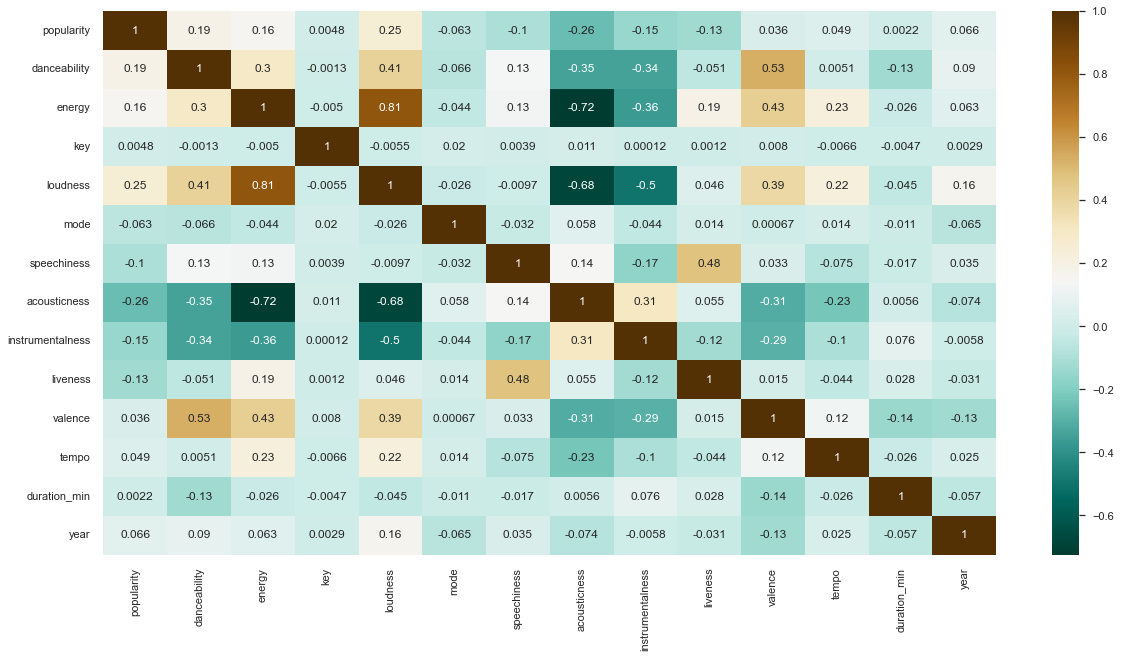

In [21]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

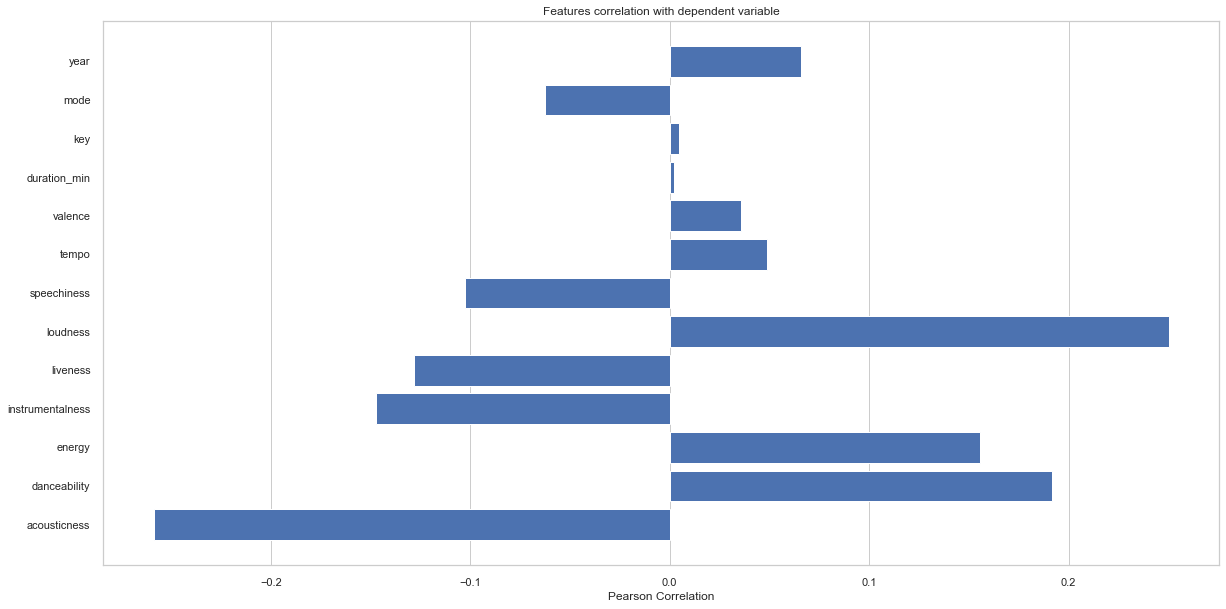

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [22]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_min','key','mode','year']

X, y = df[feature_names], df['popularity']

features = np.array(feature_names)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,10)
visualizer.fit(X, y)
visualizer.show()
# visualizer.show(outpath='features_correlation.png')  

In [23]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness','mode','year']
ros = RandomOverSampler()
X = df[feature_names]
y = df['popularity']
X_ros, y_ros = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=42, test_size=0.2)

knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=1))
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=10, max_depth=8, min_samples_leaf=8))
gbr = make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=10, max_depth=8, min_samples_leaf=8))
lr = make_pipeline(StandardScaler(), LinearRegression())

models = [['KNN', knn], ['Random Forest', rf], ['Gradient Boosting', gbr], ['Linear Regression', lr]]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model: {}, R2 score: {}'.format(name, r2_score(y_test, y_pred)))


Model: KNN, R2 score: 0.973475993137846
Model: Random Forest, R2 score: 0.5948427383908403
Model: Gradient Boosting, R2 score: 0.5375265580487354
Model: Linear Regression, R2 score: 0.35487578651208684
